In [1]:
import torch
from data import ClimateDataset
from models import ClassificationModel
from engine import Engine
import warnings
warnings.filterwarnings("ignore")

/mnt/software/miniconda3/envs/flicc/lib/python3.8/site-packages/bitsandbytes/cuda_setup/main.py:106: UserWarning: 

BNB_CUDA_VERSION=XXX can be used to load a bitsandbytes version that is different from the PyTorch CUDA version.
If this was unintended set the BNB_CUDA_VERSION variable to an empty string: export BNB_CUDA_VERSION=
If you use the manual override make sure the right libcudart.so is in your LD_LIBRARY_PATH
For example by adding the following to your .bashrc: export LD_LIBRARY_PATH=$LD_LIBRARY_PATH:<path_to_cuda_dir/lib64
Loading CUDA version: BNB_CUDA_VERSION=118


  warn((f'\n\n{"="*80}\n'


In [2]:
model_checkpoint='EleutherAI/gpt-neo-1.3B'

In [3]:
results = {'acc':[],
           'f1':[],
           'lr':[]}

In [4]:
learning_rates = [1.0e-3, 1.0e-4, 1.0e-5, 1.0e-6]
for lr in learning_rates:
    print(f'Grid search {model_checkpoint}, learning rate {lr}')
    data = ClimateDataset(model_to_train=1,model_checkpoint=model_checkpoint,batch_size=16)
    data.setup_dataloaders()
    model = ClassificationModel(model_checkpoint=data.model_checkpoint,num_labels=data.num_labels, quantized_model=True)
    trainer = Engine(epochs=10,labels=data.labels)
    trainer.model = model.model
    trainer.device = model.device
    acc, f1 = trainer.run(lr=lr,wd=0.0,train_dataloader=data.train_dataloader,eval_dataloader=data.eval_dataloader,test_dataloader=data.test_dataloader, early_stop=3)
    results['acc'].append(acc)
    results['f1'].append(f1)
    results['lr'].append(lr)
    print('### '*10)
    print(results)
    print('### '*10)
    with torch.no_grad():
        torch.cuda.empty_cache()
    del data, model, trainer, acc, f1

Grid search EleutherAI/gpt-neo-1.3B, learning rate 0.001


Map:   0%|          | 0/457 [00:00<?, ? examples/s]

Some weights of GPTNeoForSequenceClassification were not initialized from the model checkpoint at EleutherAI/gpt-neo-1.3B and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 10: Train Loss:	0.9659	Val Loss:	0.9653	Accuracy:	0.4989	F1:	0.4162
2 / 10: Train Loss:	0.9659	Val Loss:	0.9653	Accuracy:	0.4989	F1:	0.4162
3 / 10: Train Loss:	0.9659	Val Loss:	0.9653	Accuracy:	0.4989	F1:	0.4162
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
              precision    recall  f1-score   support

       bknow       0.17      0.24      0.20       119
      struct       0.69      0.59      0.64       338

    accuracy                           0.50       457
   macro avg       0.43      0.41      0.42       457
weighted avg       0.55      0.50      0.52       457

test results:
              precision    recall  f1-score   support

       bknow       0.21      0.27      0.24        67
      struct       0.71      0.64      0.67       189

    accuracy                           0.54       256
   macro avg       0.46      0.45      0.45       256
weighted avg       0.58      0.54      0.56       256

### ### ### ### ### ### ### 

Some weights of GPTNeoForSequenceClassification were not initialized from the model checkpoint at EleutherAI/gpt-neo-1.3B and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 10: Train Loss:	0.9659	Val Loss:	0.9653	Accuracy:	0.4989	F1:	0.4162
2 / 10: Train Loss:	0.9659	Val Loss:	0.9653	Accuracy:	0.4989	F1:	0.4162
3 / 10: Train Loss:	0.9659	Val Loss:	0.9653	Accuracy:	0.4989	F1:	0.4162
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
              precision    recall  f1-score   support

       bknow       0.17      0.24      0.20       119
      struct       0.69      0.59      0.64       338

    accuracy                           0.50       457
   macro avg       0.43      0.41      0.42       457
weighted avg       0.55      0.50      0.52       457

test results:
              precision    recall  f1-score   support

       bknow       0.21      0.27      0.24        67
      struct       0.71      0.64      0.67       189

    accuracy                           0.54       256
   macro avg       0.46      0.45      0.45       256
weighted avg       0.58      0.54      0.56       256

### ### ### ### ### ### ### 

Some weights of GPTNeoForSequenceClassification were not initialized from the model checkpoint at EleutherAI/gpt-neo-1.3B and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 10: Train Loss:	0.9659	Val Loss:	0.9653	Accuracy:	0.4989	F1:	0.4162
2 / 10: Train Loss:	0.9659	Val Loss:	0.9653	Accuracy:	0.4989	F1:	0.4162
3 / 10: Train Loss:	0.9659	Val Loss:	0.9653	Accuracy:	0.4989	F1:	0.4162
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
              precision    recall  f1-score   support

       bknow       0.17      0.24      0.20       119
      struct       0.69      0.59      0.64       338

    accuracy                           0.50       457
   macro avg       0.43      0.41      0.42       457
weighted avg       0.55      0.50      0.52       457

test results:
              precision    recall  f1-score   support

       bknow       0.21      0.27      0.24        67
      struct       0.71      0.64      0.67       189

    accuracy                           0.54       256
   macro avg       0.46      0.45      0.45       256
weighted avg       0.58      0.54      0.56       256

### ### ### ### ### ### ### 

Some weights of GPTNeoForSequenceClassification were not initialized from the model checkpoint at EleutherAI/gpt-neo-1.3B and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 10: Train Loss:	0.9659	Val Loss:	0.9653	Accuracy:	0.4989	F1:	0.4162
2 / 10: Train Loss:	0.9659	Val Loss:	0.9653	Accuracy:	0.4989	F1:	0.4162
3 / 10: Train Loss:	0.9659	Val Loss:	0.9653	Accuracy:	0.4989	F1:	0.4162
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
              precision    recall  f1-score   support

       bknow       0.17      0.24      0.20       119
      struct       0.69      0.59      0.64       338

    accuracy                           0.50       457
   macro avg       0.43      0.41      0.42       457
weighted avg       0.55      0.50      0.52       457

test results:
              precision    recall  f1-score   support

       bknow       0.21      0.27      0.24        67
      struct       0.71      0.64      0.67       189

    accuracy                           0.54       256
   macro avg       0.46      0.45      0.45       256
weighted avg       0.58      0.54      0.56       256

### ### ### ### ### ### ### 

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

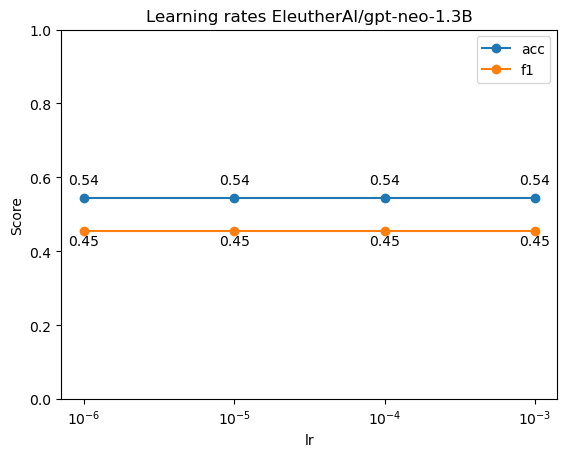

In [6]:
def plot_grid_search(df, title):

    # Create the plot
    ax = df.plot(x='lr', y=['acc', 'f1'], marker='o', linestyle='-')

    # Set y-axis range between 0 and 1
    plt.ylim(0, 1)

    # Annotate points with F1 scores
    for i, row in df.iterrows(): 
        ax.annotate(f'{row["f1"]:.2f}', (row["lr"], row["f1"]), textcoords='offset points', xytext=(0, -10), ha='center')

    # Annotate points with Acc scores
    for i, row in df.iterrows():
        ax.annotate(f'{row["acc"]:.2f}', (row["lr"], row["acc"]), textcoords='offset points', xytext=(0, 10), ha='center')
    
    # 
    plt.xticks(df['lr'], [f'{val:.0e}' for val in df['lr']], ha='center')
    plt.xscale('log')
    plt.minorticks_off()

    plt.title(title)
    plt.xlabel('lr')
    plt.ylabel('Score')
    plt.show()

plot_grid_search(pd.DataFrame(results), f'Learning rates {model_checkpoint}')